In [1]:
import pandas as pd

df = pd.read_csv("Courses.csv")
pd.set_option('display.max_columns', None)
df.head()

,index,Random,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,0,86,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,12/19/2012,11/17/2013,NaN,9.0,NaN,NaN,0,NaN,1.0
1,1,7,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,10/15/2012,NaN,NaN,9.0,NaN,1.0,0,NaN,1.0
2,2,70,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2/8/2013,11/17/2013,NaN,16.0,NaN,NaN,0,NaN,1.0
3,3,60,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,9/17/2012,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
4,4,3,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,12/19/2012,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0


In [2]:
# course_id별 코스명 딕셔너리 정의
course_name_map = {
    "HarvardX/CB22x/2013_Spring": "The Ancient Greek Hero",
    "HarvardX/CS50x/2012": "Introduction to Computer Science",
    "HarvardX/ER22x/2013_Spring": "Justice",
    "HarvardX/PH207x/2012_Fall": "Health in Numbers: Quantitative Methods in Clinical & Public Health Research",
    "HarvardX/PH278x/2013_Spring": "Human Health and Global Environmental Change",
    "MITx/6.002x/2012_Fall": "Circuits and Electronics",
    "MITx/6.002x/2013_Spring": "Circuits and Electronics",
    "MITx/14.73x/2013_Spring": "The Challenges of Global Poverty",
    "MITx/2.01x/2013_Spring": "Elements of Structures",
    "MITx/3.091x/2012_Fall": "Introduction to Solid State Chemistry",
    "MITx/3.091x/2013_Spring": "Introduction to Solid State Chemistry",
    "MITx/6.00x/2012_Fall": "Introduction to Computer Science and Programming",
    "MITx/6.00x/2013_Spring": "Introduction to Computer Science and Programming",
    "MITx/7.00x/2013_Spring": "Introduction to Biology - The Secret of Life",
    "MITx/8.02x/2013_Spring": "Physics II: Electricity and Magnetism",
    "MITx/8.MReV/2013_Summer": "Mechanics ReView"
}

# course_id별 코스 도메인 딕셔너리 정의
course_domain_map = {
    "HarvardX/CB22x/2013_Spring": "humanities",
    "HarvardX/ER22x/2013_Spring": "humanities",
    "MITx/14.73x/2013_Spring": "social sciences",
    "HarvardX/CS50x/2012": "major",
    "HarvardX/PH207x/2012_Fall": "major",
    "HarvardX/PH278x/2013_Spring": "major",
    "MITx/6.002x/2012_Fall": "major",
    "MITx/6.002x/2013_Spring": "major",
    "MITx/2.01x/2013_Spring": "major",
    "MITx/3.091x/2012_Fall": "major",
    "MITx/3.091x/2013_Spring": "major",
    "MITx/6.00x/2012_Fall": "major",
    "MITx/6.00x/2013_Spring": "major",
    "MITx/7.00x/2013_Spring": "major",
    "MITx/8.02x/2013_Spring": "major",
    "MITx/8.MReV/2013_Summer": "major"
}

df['course_name'] = df['course_id'].map(course_name_map)
df['course_domain'] = df['course_id'].map(course_domain_map)

# 컬럼명 소문자로 변환 + 일부 이름 변경
df.columns = [col.lower() for col in df.columns]
df.rename(columns ={
    'userid_di': 'user_id',
    'final_cc_cname_di': 'country',
    'loe_di': 'education',
    'start_time_di': 'start_time',
    'last_event_di': 'last_event' 
}, inplace=True)

# 불필요한 컬럼 제거
columns_to_drop = ['index', 'random', 'registered', 'roles']
df.drop(columns = columns_to_drop, inplace=True)

강의명과 강의 지식 영역에 따라 '인문학(humanities), 사회과학(social sciences), 전공(major)'정보를 추가 했다.   
추가로 분석하기 용이 하도록 컬럼명을 소문자로 변환하고 일부 컬럼명을 변경했다. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641138 entries, 0 to 641137
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   course_id        641138 non-null  object 
 1   user_id          641138 non-null  object 
 2   viewed           641138 non-null  int64  
 3   explored         641138 non-null  int64  
 4   certified        641138 non-null  int64  
 5   country          641138 non-null  object 
 6   education        535130 non-null  object 
 7   yob              544533 non-null  float64
 8   gender           554332 non-null  object 
 9   grade            592766 non-null  object 
 10  start_time       641138 non-null  object 
 11  last_event       462184 non-null  object 
 12  nevents          441987 non-null  float64
 13  ndays_act        478395 non-null  float64
 14  nplay_video      183608 non-null  float64
 15  nchapters        382385 non-null  float64
 16  nforum_posts     641138 non-null  int6

In [4]:
# course_domain 컬럼의 각 값(humanities, major)에 대해 certified 컬럼의 비율(= 수료한 사람의 비율)을 구하는 코드
domain_certified_ratio = df.groupby('course_domain')['certified'].mean() * 100
domain_certified_ratio

course_domain
humanities         3.123284
major              2.447800
social sciences    7.481163
Name: certified, dtype: float64

MOOC의 특성상 수료율은 매우 낮고, 수료율 순위는 'social sciences > humanities > major'이다.    
social sciences는 1개 강의지만, 수료율이 다른 강의에 비해 2배 내외로 높다.

In [ ]:
# course_name별 수료 비율 확인
name_certified_ratio = (df.groupby(['course_domain','course_name'])['certified'].mean() * 100).reset_index()
name_certified_ratio

,course_domain,course_name,certified
0,humanities,Justice,4.086681
1,humanities,The Ancient Greek Hero,1.279915
2,major,Circuits and Electronics,3.716334
3,major,Elements of Structures,4.360106
4,major,Health in Numbers: Quantitative Methods in Cli...,4.428736
5,major,Human Health and Global Environmental Change,1.795364
6,major,Introduction to Biology - The Secret of Life,3.917369
7,major,Introduction to Computer Science,0.758750
8,major,Introduction to Computer Science and Programming,2.997284
9,major,Introduction to Solid State Chemistry,3.783040


하버드 인문학 강의 수료율 = Justice: 4%, The Ancient Greek Hero: 1.2%

<Axes: xlabel='course_name'>

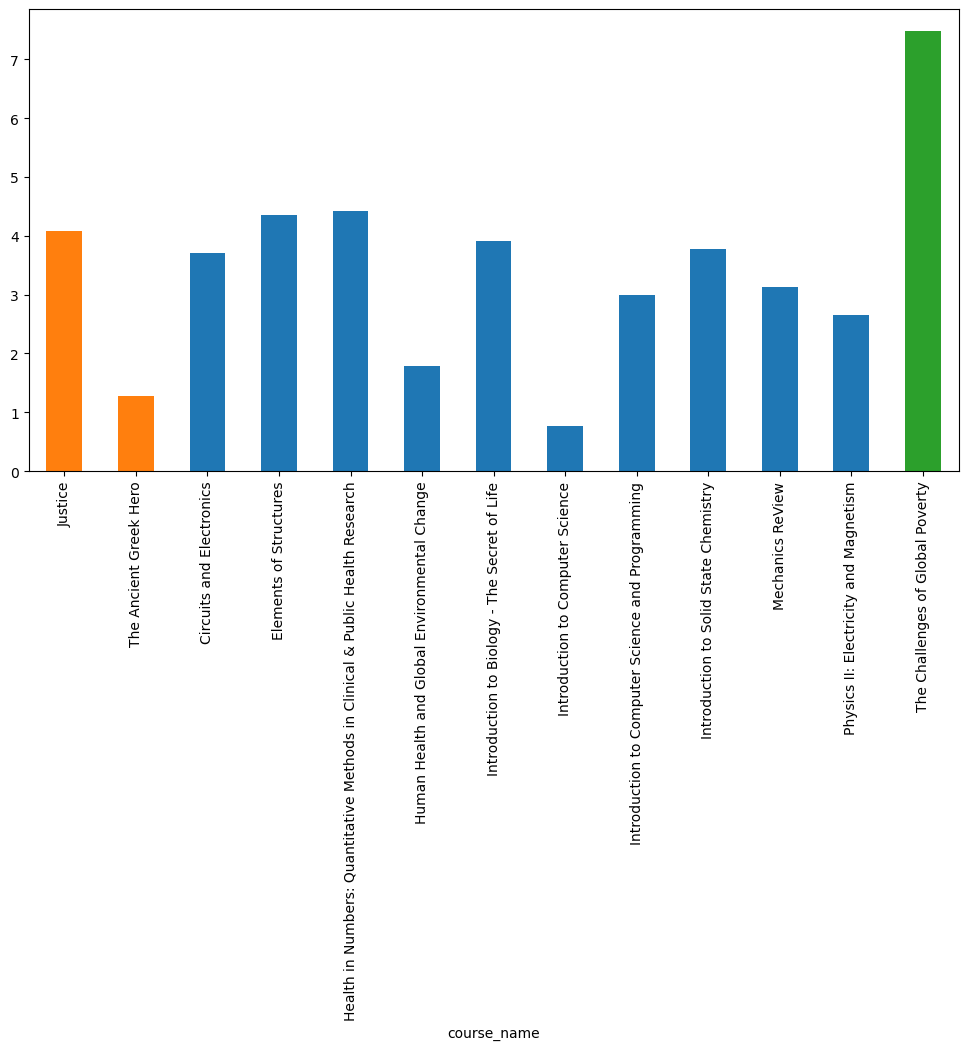

In [ ]:
# course_name별 수료율 시각화
domain_colors = {
    'humanities': 'tab:orange',
    'social sciences': 'tab:green',
    'major': 'tab:blue'
} # 도메인 기준으로 색상 딕셔너리 만들기 
colors = name_certified_ratio['course_domain'].map(domain_colors) # 색상 리스트 생성(각 행의 도메인에 따라 색 지정)
name_certified_ratio.plot(kind='bar', x='course_name', y='certified', color=colors, figsize=(12,6), legend=False)

위에 코스별 수료율값으로 단순히 도메인별 수료율을 구하면 '가중평균 미적용 오류(수강자 수를 고려하지 않고 코스 평균만 사용함)'가 발생한다. 주의해야 한다.   
humanities에서 'The Ancient Greek Hero'와 'Justice'의 수료율 차이의 원인을 찾아보자.

In [7]:
# 두 강의 학습자만 필터링
selected_courses = ['The Ancient Greek Hero', 'Justice']
df_selected = df[df['course_name'].isin(selected_courses)].copy()
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87408 entries, 0 to 338218
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   course_id        87408 non-null  object 
 1   user_id          87408 non-null  object 
 2   viewed           87408 non-null  int64  
 3   explored         87408 non-null  int64  
 4   certified        87408 non-null  int64  
 5   country          87408 non-null  object 
 6   education        75510 non-null  object 
 7   yob              75556 non-null  float64
 8   gender           77364 non-null  object 
 9   grade            74169 non-null  object 
 10  start_time       87408 non-null  object 
 11  last_event       72334 non-null  object 
 12  nevents          65288 non-null  float64
 13  ndays_act        69125 non-null  float64
 14  nplay_video      0 non-null      float64
 15  nchapters        48342 non-null  float64
 16  nforum_posts     87408 non-null  int64  
 17  incomplete_flag 

- 변수 타입 변경
- 컬럼 타입 변경 및 'nplay_video' 컬럼 제거  
    - 제거 이유: nplay_video는 시스템 오류 또는 처음 데이터를 병합하는 과정에서 누락을 의심할 수 밖에 없게끔 모든 학습자들의 데이터가 결측

In [8]:
# yob: 숫자형으로 변환 후 int64로 변환
df_selected['yob'] = pd.to_numeric(df_selected['yob'], errors='coerce').astype('Int64')

# grade: 소수점 제거 -> int64로 변환(nan 허용)
df_selected['grade'] = pd.to_numeric(df_selected['grade'], errors='coerce')
df_selected['grade'] = (df_selected['grade'] * 100).round().astype('Int64') 
# 날짜형 컬럼 변환
df_selected['start_time'] = pd.to_datetime(df_selected['start_time'], errors='coerce')
df_selected['last_event'] = pd.to_datetime(df_selected['last_event'], errors='coerce')

# float -> int로 변환
float_cols = ['nevents', 'ndays_act', 'nplay_video', 'nchapters', 'incomplete_flag']
df_selected[float_cols] = df_selected[float_cols].astype('Int64')

# nplay_video: 컬럼 제거
df_selected.drop(columns = 'nplay_video', inplace=True)

In [9]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87408 entries, 0 to 338218
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   course_id        87408 non-null  object        
 1   user_id          87408 non-null  object        
 2   viewed           87408 non-null  int64         
 3   explored         87408 non-null  int64         
 4   certified        87408 non-null  int64         
 5   country          87408 non-null  object        
 6   education        75510 non-null  object        
 7   yob              75556 non-null  Int64         
 8   gender           77364 non-null  object        
 9   grade            73298 non-null  Int64         
 10  start_time       87408 non-null  datetime64[ns]
 11  last_event       72334 non-null  datetime64[ns]
 12  nevents          65288 non-null  Int64         
 13  ndays_act        69125 non-null  Int64         
 14  nchapters        48342 non-null  Int64    

강의별 학습자 수 확인

In [10]:
df_selected['course_name'].value_counts()

course_name
Justice                   57406
The Ancient Greek Hero    30002
Name: count, dtype: int64

두 강의의 (전처리 전) 학습자가 5.7만과 3만으로 1.9배 차이 난다.  

분석하기 용이하도록 강의별로 별칭('alias')을 만든다.   
- The Ancient Greek Hero: hero
- Justice: just

In [11]:
# 강의명 별칭 컬럼 추가
alias_map = {
    "The Ancient Greek Hero": "hero",
    "Justice": "just"
}
df_selected['alias'] = df_selected['course_name'].map(alias_map)

In [12]:
df_selected.head()

,course_id,user_id,viewed,explored,certified,country,education,yob,gender,grade,start_time,last_event,nevents,ndays_act,nchapters,nforum_posts,incomplete_flag,course_name,course_domain,alias
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,0,0,0,United States,NaN,<NA>,NaN,0,2012-12-19,2013-11-17,<NA>,9,<NA>,0,1,The Ancient Greek Hero,humanities,hero
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,0,0,0,United States,NaN,<NA>,NaN,0,2013-02-08,2013-11-17,<NA>,16,<NA>,0,1,The Ancient Greek Hero,humanities,hero
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,0,0,0,United States,NaN,<NA>,NaN,0,2012-12-19,NaT,<NA>,16,<NA>,0,1,Justice,humanities,just
7,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,0,0,France,NaN,<NA>,NaN,0,2013-01-01,2013-05-14,42,6,3,0,<NA>,The Ancient Greek Hero,humanities,hero
8,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,0,0,United States,NaN,<NA>,NaN,0,2013-02-18,2013-03-17,70,3,3,0,<NA>,The Ancient Greek Hero,humanities,hero


In [13]:
# 컬럼별 결측값 확인
print(df_selected.shape)
print(df_selected.isna().sum())

(87408, 20)
course_id              0
user_id                0
viewed                 0
explored               0
certified              0
country                0
education          11898
yob                11852
gender             10044
grade              14110
start_time             0
last_event         15074
nevents            22120
ndays_act          18283
nchapters          39066
nforum_posts           0
incomplete_flag    83314
course_name            0
course_domain          0
alias                  0
dtype: int64


- 코호트 구성을 위한 last_event 컬럼에 결측값이 없어야 한다. 
- 코호트 구성

In [14]:
#  last_even 결측행 제거
df_selected = df_selected.dropna(subset=['last_event'])
df_selected.isna().sum()



course_id              0
user_id                0
viewed                 0
explored               0
certified              0
country                0
education           9998
yob                10047
gender              8533
grade              11744
start_time             0
last_event             0
nevents             7046
ndays_act           5725
nchapters          24201
nforum_posts           0
incomplete_flag    70925
course_name            0
course_domain          0
alias                  0
dtype: int64

In [15]:
df_selected.columns

Index(['course_id', 'user_id', 'viewed', 'explored', 'certified', 'country',
       'education', 'yob', 'gender', 'grade', 'start_time', 'last_event',
       'nevents', 'ndays_act', 'nchapters', 'nforum_posts', 'incomplete_flag',
       'course_name', 'course_domain', 'alias'],
      dtype='object')

# Hero Hazard Function

코호트 구성  
**코호트 week 0까지(두번째 콘텐츠가 노출 되기 전일인 '2018-03-18'까지)의 코호트만** 활용해서 해저드 펑션을 구한다.   
이유는 매주 새로 공개되는 콘테츠의 구성으로 인해 학습자가 강의가 공개 된 주간에 이탈 했는지 판단하기 위해서다. 

In [16]:
import numpy as np

# 날짜 기준 정의 
course_open_date = pd.to_datetime('2013-03-12') # 강의 공개일
chort_cutoff_date = pd.to_datetime('2013-03-18') # week 0까지 등록한 사용자만 분석
last_event_cutoff_date = pd.to_datetime('2013-08-26') # week 23: 2013-08-26 (모든 채점 대상 과제 제출 마감일)

# 조건 필터링
filtered_hero = df_selected[
    (df_selected['alias'] == 'hero') &
    (df_selected['start_time'].notnull()) &
    (df_selected['start_time'] <= chort_cutoff_date) &
    (df_selected['last_event'].notnull()) &
    (df_selected['last_event'] <= last_event_cutoff_date)
].copy()

# 계산 컬럼 추가
filtered_hero['cohort_week'] = ((filtered_hero['start_time'] - course_open_date).dt.days // 7).astype(int)
filtered_hero['duration_week'] = ((filtered_hero['last_event'] - filtered_hero['start_time']).dt.days // 7).astype(int)

# 결과 DataFrame 구성
base_hero = filtered_hero[['user_id', 'course_id', 'course_name','alias', 'start_time', 'last_event', 'cohort_week', 'duration_week', 'certified']].copy()
base_hero.reset_index(drop=True, inplace=True)
base_hero


,user_id,course_id,course_name,alias,start_time,last_event,cohort_week,duration_week,certified
0,MHxPC130539455,HarvardX/CB22x/2013_Spring,The Ancient Greek Hero,hero,2013-01-01,2013-05-14,-10,19,0
1,MHxPC130088379,HarvardX/CB22x/2013_Spring,The Ancient Greek Hero,hero,2013-02-18,2013-03-17,-4,3,0
2,MHxPC130024894,HarvardX/CB22x/2013_Spring,The Ancient Greek Hero,hero,2013-01-24,2013-08-03,-7,27,0
3,MHxPC130340959,HarvardX/CB22x/2013_Spring,The Ancient Greek Hero,hero,2013-02-11,2013-04-06,-5,7,0
4,MHxPC130435030,HarvardX/CB22x/2013_Spring,The Ancient Greek Hero,hero,2013-02-20,2013-06-29,-3,18,0
...,...,...,...,...,...,...,...,...,...
12246,MHxPC130208238,HarvardX/CB22x/2013_Spring,The Ancient Greek Hero,hero,2013-03-18,2013-08-01,0,19,0
12247,MHxPC130020014,HarvardX/CB22x/2013_Spring,The Ancient Greek Hero,hero,2013-03-18,2013-03-20,0,0,0
12248,MHxPC130564278,HarvardX/CB22x/2013_Spring,The Ancient Greek Hero,hero,2013-03-18,2013-08-03,0,19,0
12249,MHxPC130210790,HarvardX/CB22x/2013_Spring,The Ancient Greek Hero,hero,2013-03-18,2013-03-19,0,0,0


base_hero 데이터로 코호트별 주차별 hazard function을 구하자.

### 코호트 정의
- cohort_week은 사용자가 언제 강의에 등록했는지를 기준으로 정의됨
- 예: cohort_week = -12는 강의 공개일(2013-03-12) 기준 12주 전에 등록한 사용자들

### 해저드 펑션 정의 조건
- t < 0 (강의 공개 전):  ( [] 여기서 말하는 0이 상대주간의 0인가?)
    - n(t): 등록 후 t까지 이탈하지 않은 사용자 수
    - d(t): 강의 공개 전에 활동을 중단한 사용자 수 (duration_weeks == t)

- t ≥ 0 (강의 공개 후):
    - n(t): 해당 주차까지 생존한 인원  
    - d(t): 해당 주차에 마지막 활동한 인원 중 수료하지 않은 사용자 수

> 즉, 해저드 펑션은 코호트별로 t ≥ 0부터 계산되고,  
week 0 전에 이탈한 학습자는 n(t) 계산에서 제외돼야 한다.

### 해결 방안
1. cohort별 전체 등록자 수 계산
2. t < 0 구간에서 duration_weeks 기준으로 사전 이탈자 식별
3. week 0에 도달한 사용자만 대상으로 t ≥ 0 주차별로 해저드 계산

In [17]:
hazard_record_hero = []

for cohort in sorted(base_hero['cohort_week'].unique()):
    cohort_hero = base_hero[base_hero['cohort_week'] == cohort].copy()

    # 이 코호트에 속한 학습자 중, 강의 공개 시점(week 0)까지 활동을 유지한 학습자만 추출한다.
    # 여기서 week0_threshold는 cohort 주차의 절대값이며, 이는 강의가 공개되기까지 기다려야 하는 주차 수와 동일하다.
    week0_threshold = abs(cohort)
    alive_hero = cohort_hero[cohort_hero['duration_week'] >= week0_threshold].copy()

    # 상대 주차를 계산한다. 강의 공개일을 기준으로 이후 몇 주 동안 활동했는지를 나타내는 변수다.
    alive_hero['relative_week'] = alive_hero['duration_week'] - week0_threshold

    # 상대 주차별로 해저드 펑션을 계산한다.
    for t in range(alive_hero['relative_week'].max() + 1):
        # 주차 t까지 학습 활동을 유지하고 있는(즉, 아직 이탈하지 않은) 학습자 수를 계산한다.
        n_t = alive_hero[alive_hero['relative_week'] >= t].shape[0]

        # 주차 t에 마지막 활동을 하고 수료하지 않은 채 학습을 중단한(=dropout) 학습자 수를 계산한다.
        d_t = alive_hero[(alive_hero['relative_week'] == t) & (alive_hero['certified'] == 0)].shape[0]

        # 해당 주차의 해저드 펑션(hazard function)을 계산한다. 이는 그 주차에 이탈할 확률을 의미한다.
        h_t = d_t / n_t if n_t > 0 else None

        hazard_record_hero.append({
            'cohort_week': cohort,
            'relative_week': t,
            'n(t)': n_t,
            'd(t)': d_t,
            'h(t)': h_t
        })

# 주차별 해저드 계산 결과를 하나의 데이터프레임으로 정리한다.
hazard_hero = pd.DataFrame(hazard_record_hero)


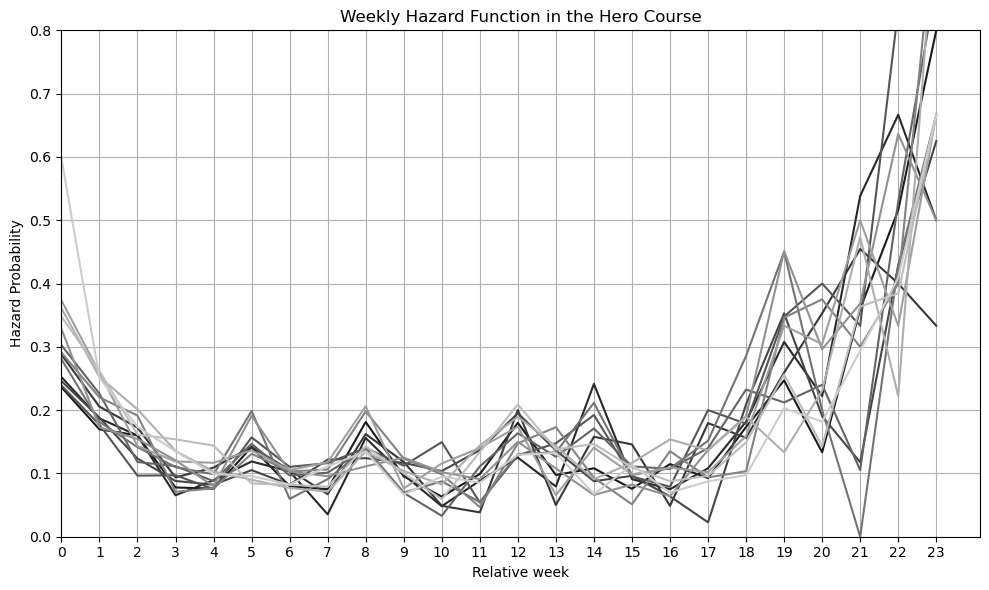

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.figure(figsize=(10, 6))

# cohort_week 정렬 기준으로 색상 밝기 조정 (어두운 -> 밝은 회색)
cohorts_sorted = sorted(hazard_hero['cohort_week'].unique())
num_cohorts = len(cohorts_sorted)
colors = [str(0.1 + 0.7 * (i / (num_cohorts - 1))) for i in range(num_cohorts)]  # 0.2~0.8 사이 밝기(가장 먼저 등록한 코호트를 가장 어둡게 하고, 가장 늦게 등록한 코호트는 가장 밝게)

for idx, cohort in enumerate(cohorts_sorted):
    group = hazard_hero[hazard_hero['cohort_week'] == cohort]
    plt.plot(group['relative_week'], group['h(t)'], color=colors[idx], label=f'Cohort {cohort}', alpha=1)

# x축 설정
max_week = hazard_hero['relative_week'].max()
plt.xticks(ticks=range(0, max_week + 1, 1))
plt.xlim(left=0)

plt.xlabel('Relative week')
plt.ylabel('Hazard Probability')
plt.title('Weekly Hazard Function in the Hero Course')
plt.ylim(0, 0.8)
plt.grid(True)
plt.tight_layout()
plt.show()

